<a href="https://colab.research.google.com/github/670510767/Lawitra-Phanpanich/blob/main/_project_323_68_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Netflix_titles**

**Block 1: Import & Load Data**

In [ ]:
import numpy as np # สำหรับคำนวณตัวเลขและ array
import pandas as pd # สำหรับจัดการข้อมูลในรูปแบบ DataFrame

In [ ]:
# โหลดข้อมูล Netflix จากไฟล์ CSV
titles = pd.read_csv('netflix_titles.csv')

**Block 2: Data Inspection**

In [ ]:
# ตรวจสอบโครงสร้างข้อมูล titles เช่น จำนวนแถว จำนวนคอลัมน์ ชนิดข้อมูล และ missing values
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# แสดงข้อมูลทั้งหมดใน DataFrame titles
display(titles)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# แสดงชื่อคอลัมน์ทั้งหมดใน DataFrame titles ในรูปแบบ list
titles.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
# ตรวจสอบจำนวนค่าที่หายไป (missing values) ในแต่ละคอลัมน์ของ DataFrame titles
titles.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# ตรวจสอบจำนวนแถวข้อมูลที่ซ้ำกัน (duplicated rows) ใน DataFrame titles
print("Duplicate rows:", titles.duplicated().sum())

Duplicate rows: 0


**Block 3: Data Cleaning & Preprocessing**

In [ ]:
# 1 แปลง date_added เป็น datetime และสร้าง column ปี/เดือนที่เพิ่ม content
titles['date_added'] = pd.to_datetime(titles['date_added'], errors='coerce')  # แปลง column date_added
titles['year_added'] = titles['date_added'].dt.year  # เพิ่ม column ปีที่เพิ่ม content
titles['month_added'] = titles['date_added'].dt.month  # เพิ่ม column เดือนที่เพิ่ม content

# 2 ตรวจสอบและลบแถวซ้ำ
print("🔍 ตรวจสอบข้อมูลก่อนและหลังทำความสะอาด")
print("- Duplicate rows before cleaning:", titles.duplicated().sum())
titles = titles.drop_duplicates()

# 3 ลบ column ที่ไม่ได้ใช้ (description)
if 'description' in titles.columns:
    titles = titles.drop(columns=['description'])

# 4-7 เติมค่า missing ของ director โดยใช้ความสัมพันธ์ director-cast
titles['dir_cast'] = titles['director'] + '---' + titles['cast']  # สร้างคู่ director-cast
counts = titles['dir_cast'].value_counts()
filtered_counts = counts[counts >= 3]  # เฉพาะคู่ที่ซ้ำ ≥3 ครั้ง
lst_dir_cast = list(filtered_counts.index)

dict_direcast = {}
for i in lst_dir_cast:
    director, cast = i.split('---')
    dict_direcast[director] = cast

# เติมค่า missing ของ director ตาม cast
for director, cast in dict_direcast.items():
    titles.loc[(titles['director'].isna()) & (titles['cast'] == cast), 'director'] = director

# เติมค่า "Not Given" ให้ director ที่ยัง missing
titles.loc[titles['director'].isna(), 'director'] = 'Not Given'

# 8–10 เติมค่า missing ของ country จาก director
directors = titles['director']
countries = titles['country']
pairs = zip(directors, countries)
dir_cntry = dict(list(pairs))  # สร้าง dictionary {director: country}

for director, country in dir_cntry.items():
    titles.loc[(titles['country'].isna()) & (titles['director'] == director), 'country'] = country

# เติมค่า "Not Given" ให้ country ที่ยัง missing
titles.loc[titles['country'].isna(), 'country'] = 'Not Given'

# 11 เติมค่า "Not Given" ให้ cast ที่ missing
titles.loc[titles['cast'].isna(), 'cast'] = 'Not Given'

# 12 ตรวจสอบและลบแถวที่ critical fields ยัง missing
print("- Missing date_added before cleaning:", titles['date_added'].isna().sum())
print("- Missing rating before cleaning:", titles['rating'].isna().sum())
print("- Missing duration before cleaning:", titles['duration'].isna().sum())

titles.drop(titles[titles['date_added'].isna()].index, axis=0, inplace=True)
titles.drop(titles[titles['rating'].isna()].index, axis=0, inplace=True)
titles.drop(titles[titles['duration'].isna()].index, axis=0, inplace=True)

# ✅ สรุป Missing values หลังทำความสะอาด
print("\n✅ Missing values after cleaning:")
print(titles.isnull().sum()[titles.isnull().sum() > 0])  # แสดงเฉพาะ columns ที่ยังมี missing (ถ้ามี)

🔍 ตรวจสอบข้อมูลก่อนและหลังทำความสะอาด
- Duplicate rows before cleaning: 0
- Missing date_added before cleaning: 98
- Missing rating before cleaning: 4
- Missing duration before cleaning: 3

✅ Missing values after cleaning:
dir_cast    3010
dtype: int64


In [ ]:
# ตรวจสอบโครงสร้าง DataFrame หลังการทำความสะอาด
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8702 non-null   object        
 1   type          8702 non-null   object        
 2   title         8702 non-null   object        
 3   director      8702 non-null   object        
 4   cast          8702 non-null   object        
 5   country       8702 non-null   object        
 6   date_added    8702 non-null   datetime64[ns]
 7   release_year  8702 non-null   int64         
 8   rating        8702 non-null   object        
 9   duration      8702 non-null   object        
 10  listed_in     8702 non-null   object        
 11  year_added    8702 non-null   float64       
 12  month_added   8702 non-null   float64       
 13  dir_cast      5692 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 1019.8+ KB


In [ ]:
# แสดงข้อมูลทั้งหมด (เป็นตาราง DataFrame)
display(titles)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,dir_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Given,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021.0,9.0,NaN
1,s2,TV Show,Blood & Water,Not Given,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021.0,9.0,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","France, Belgium",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021.0,9.0,"Julien Leclercq---Sami Bouajila, Tracy Gotoas,..."
3,s4,TV Show,Jailbirds New Orleans,Not Given,Not Given,Not Given,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV",2021.0,9.0,NaN
4,s5,TV Show,Kota Factory,Not Given,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021.0,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019.0,11.0,"David Fincher---Mark Ruffalo, Jake Gyllenhaal,..."
8803,s8804,TV Show,Zombie Dumb,Not Given,Not Given,Not Given,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019.0,7.0,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",2019.0,11.0,"Ruben Fleischer---Jesse Eisenberg, Woody Harre..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies",2020.0,1.0,"Peter Hewitt---Tim Allen, Courteney Cox, Chevy..."


In [ ]:
import datetime as dt
# Step4.1 ตรวจสอบว่ามี date_added (วันที่ลง Netflix) ที่น้อยกว่า release_year (ปีที่ออกฉาย) หรือไม่
sum(titles['date_added'].dt.year < titles['release_year'])

# Step4.2 แสดงตัวอย่าง record ที่มีปัญหา (date_added < release_year)
titles.loc[(titles['date_added'].dt.year < titles['release_year']),['date_added','release_year']]

# Step4.3 sample บาง record เพื่อตรวจสอบด้วยตา ว่าแก้ไขถูกต้องหรือยัง
titles.iloc[[1551,1696,2920,3168]]

# Step4.4 ยืนยันว่าไม่มี inconsistency อีกแล้ว
sum(titles['date_added'].dt.year < titles['release_year'])

14

In [ ]:
# ลบคอลัมน์ dir_cast ที่ใช้เติมค่า missing เสร็จแล้ว ไม่จำเป็นต้องเก็บไว้
titles.drop(columns=['dir_cast'], inplace=True, errors='ignore')

In [ ]:
# ตรวจสอบชนิดข้อมูลของแต่ละคอลัมน์ หลังจากทำความสะอาดและเพิ่มคอลัมน์ใหม่
print(titles.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
year_added             float64
month_added            float64
dtype: object


In [ ]:
# แปลงคอลัมน์ date_added เป็น datetime อีกครั้ง เผื่อมีค่าที่ไม่ถูกต้องให้เป็น NaT
titles['date_added'] = pd.to_datetime(titles['date_added'], errors='coerce')

In [ ]:
# นับจำนวนหนังที่ปล่อยก่อนปี 1997 เพื่อเช็คความเก่าของข้อมูล
print("Records before 1997:", sum(titles['release_year'] < 1997))

Records before 1997: 407


In [ ]:
# ตรวจสอบความไม่สอดคล้องระหว่าง release_year กับ date_added
print("Inconsistent release_year vs date_added:",
      sum(titles['date_added'].dt.year < titles['release_year']))

Inconsistent release_year vs date_added: 14


In [ ]:
# ตรวจสอบว่ามีค่าที่หายไป (missing values) ในแต่ละคอลัมน์
print(titles.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
year_added      0
month_added     0
dtype: int64


In [ ]:
# ใช้ตรวจสอบ visually ว่าข้อมูลหลังการทำความสะอาดเป็นไปตามที่คาดไว้
display(titles.sample(5))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
8519,s8520,TV Show,The Story of Us with Morgan Freeman,Not Given,Morgan Freeman,United States,2019-02-01,2017,TV-14,1 Season,Docuseries,2019.0,2.0
8418,s8419,Movie,The Mayor,Park In-je,"Min-sik Choi, Do-won Kwak, Eun-kyung Shim, So-...",South Korea,2017-09-30,2017,TV-MA,130 min,"Dramas, International Movies",2017.0,9.0
3666,s3667,TV Show,GRANBLUE FANTASY the Animation,Not Given,"Yuki Ono, Nao Toyama, Rie Kugimiya, Miyuki Saw...",Japan,2019-07-15,2017,TV-PG,1 Season,"Anime Series, International TV Shows",2019.0,7.0
4387,s4388,TV Show,Vai Anitta,Not Given,Anitta,Brazil,2018-11-16,2018,TV-MA,1 Season,"Docuseries, International TV Shows, Reality TV",2018.0,11.0
7954,s7955,Movie,Scandal in Sorrento,Dino Risi,"Vittorio De Sica, Sophia Loren, Lea Padovani, ...","Italy, France",2020-11-13,1955,TV-PG,93 min,"Classic Movies, Comedies, Independent Movies",2020.0,11.0


In [ ]:
# รีเซ็ตดัชนีของ DataFrame หลังจากลบหรือจัดการแถว,drop=True เพื่อไม่เก็บคอลัมน์เดิมของ index เก่า
df_reset = titles.reset_index(drop=True)

**Block 4: EDA / Visualization**

In [ ]:
# นำเข้าไลบรารีสำหรับการวิเคราะห์เชิงภาพ (Visualization)
# seaborn สำหรับ plot สวยงาม, matplotlib.pyplot สำหรับปรับแต่งกราฟ
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-1554433145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titles, x='type', palette='Set2')  # แกน x = type (Movie/TV Show)


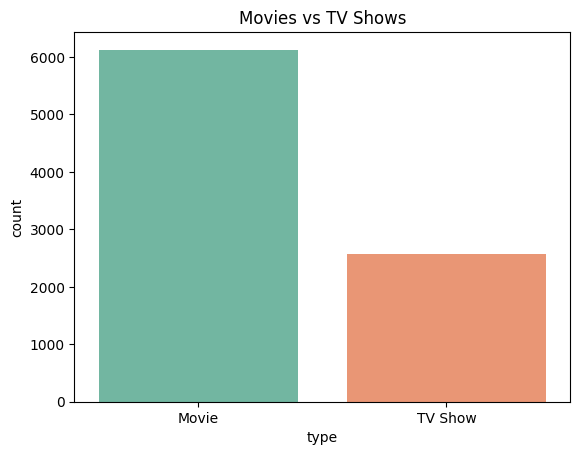

In [ ]:
# แยกข้อมูล duration ออกเป็นตัวเลขและประเภท (เช่น นาที หรือ Seasons)
titles['duration_num'] = titles['duration'].str.extract(r'(\d+)').astype(float)  # ดึงจำนวนจากคอลัมน์ duration เป็นตัวเลข float
titles['duration_type'] = titles['duration'].str.extract(r'([a-zA-Z ]+)', expand=False).str.strip()  # ดึงประเภท duration เช่น "min" หรือ "Seasons"
# วาดกราฟนับจำนวน Movies และ TV Shows โดยใช้สีแยกประเภทให้ชัดเจน
sns.countplot(data=titles, x='type', palette='Set2')  # แกน x = type (Movie/TV Show)
plt.title('Movies vs TV Shows')                        # ใส่ชื่อกราฟ
plt.show()

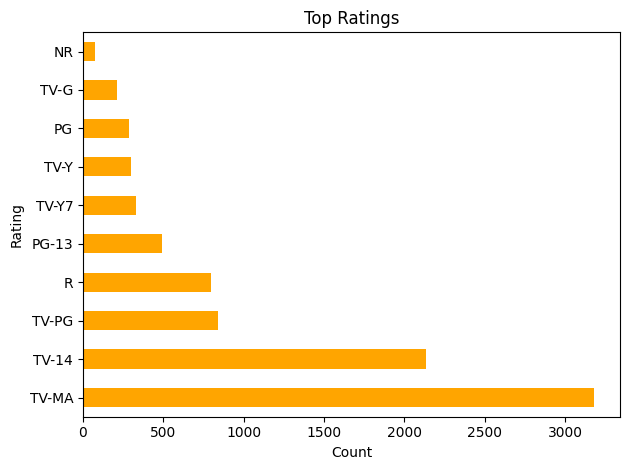

In [ ]:
# นับจำนวนแต่ละ Rating และแสดง Top 10 Ratings เป็นกราฟแนวนอน
titles['rating'].value_counts().head(10).plot(kind='barh', color='orange')  # barh = horizontal bar
plt.title('Top Ratings')        # ใส่ชื่อกราฟ
plt.xlabel('Count')             # ชื่อแกน X
plt.ylabel('Rating')            # ชื่อแกน Y (เพิ่มให้ชัดเจน)
plt.tight_layout()              # จัด layout ให้ไม่ทับข้อความ
plt.show()

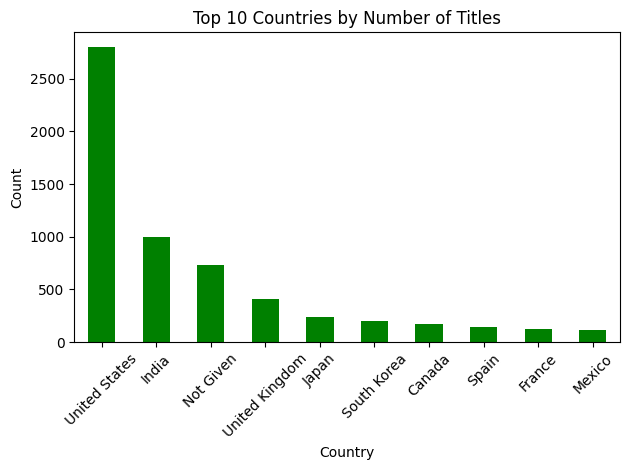

In [ ]:
# นับจำนวน Titles ตาม Country และแสดง Top 10 ประเทศที่มีจำนวน Titles มากที่สุด
titles['country'].value_counts().head(10).plot(kind='bar', color='green')  # bar = vertical bar
plt.title('Top 10 Countries by Number of Titles')  # ชื่อกราฟ
plt.ylabel('Count')                                # ชื่อแกน Y
plt.xlabel('Country')                              # ชื่อแกน X
plt.xticks(rotation=45)                             # หมุนชื่อแกน X 45 องศาให้อ่านง่าย
plt.tight_layout()                                  # จัด layout ให้ข้อความไม่ทับกัน
plt.show()

In [ ]:
# แสดงข้อมูลสรุปของ DataFrame หลังทำความสะอาด
# แสดงจำนวนแถว, คอลัมน์, ชนิดข้อมูล, จำนวนค่า non-null ของแต่ละคอลัมน์
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8702 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8702 non-null   object        
 1   type           8702 non-null   object        
 2   title          8702 non-null   object        
 3   director       8702 non-null   object        
 4   cast           8702 non-null   object        
 5   country        8702 non-null   object        
 6   date_added     8702 non-null   datetime64[ns]
 7   release_year   8702 non-null   int64         
 8   rating         8702 non-null   object        
 9   duration       8702 non-null   object        
 10  listed_in      8702 non-null   object        
 11  year_added     8702 non-null   float64       
 12  month_added    8702 non-null   float64       
 13  duration_num   8702 non-null   float64       
 14  duration_type  8702 non-null   object        
dtypes: datetime64[ns](1), floa

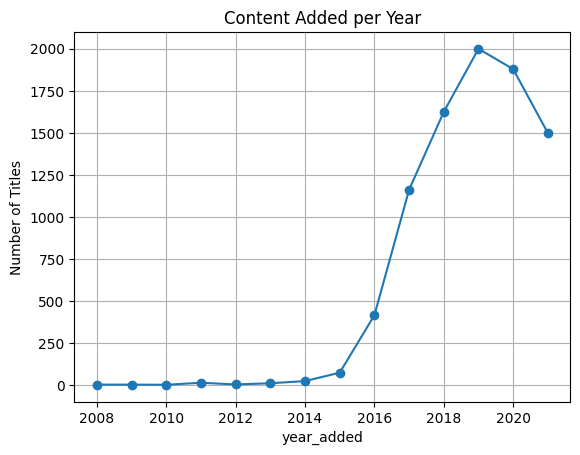

In [ ]:
# วาดกราฟเส้น (Line Plot) แสดงจำนวน Content ที่ถูกเพิ่มในแต่ละปี
# x-axis = ปีที่เพิ่ม (year_added)
# y-axis = จำนวน titles
# marker='o' เพื่อให้เห็นจุดแต่ละปีชัดเจน
titles['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Added per Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()

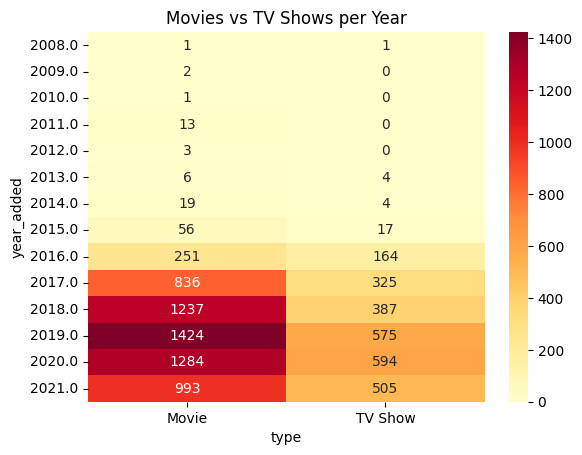

In [ ]:
# สร้าง pivot table แยกจำนวน Movies และ TV Shows ตามปีที่เพิ่ม
# index = year_added, columns = type, fill_value=0 แทนค่าที่ว่างด้วย 0
pivot = pd.pivot_table(titles, index='year_added', columns='type', aggfunc='size', fill_value=0)

# วาด heatmap เพื่อดูแนวโน้มการเพิ่ม Content แยกตามประเภท
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Movies vs TV Shows per Year')
plt.show()

# แยก Genre จากคอลัมน์ listed_in (หลาย Genre แยกด้วย comma)
all_genres = titles['listed_in'].dropna().str.split(', ')
flat_genres = [g for sublist in all_genres for g in sublist]

# นับจำนวนครั้งที่ Genre ปรากฏ และเลือก 10 อันดับแรก
genre_counts = pd.Series(flat_genres).value_counts().head(10)

/tmp/ipython-input-2309102421.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='coolwarm')


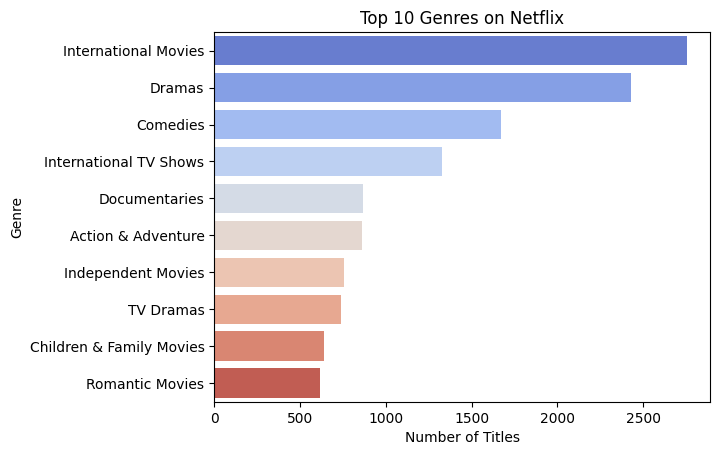

In [ ]:
# วาดกราฟ barplot แสดง 10 อันดับ Genre ที่พบมากที่สุดบน Netflix
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='coolwarm')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

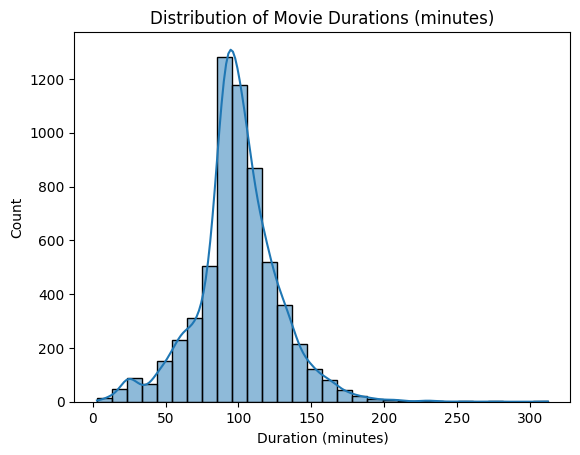

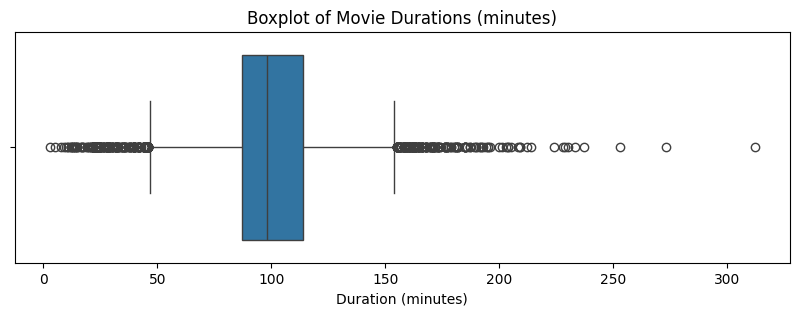

In [ ]:
# เลือกเฉพาะ Movies และเอาค่า duration_num ที่ไม่เป็น NaN
movie_durations = titles[titles['type'] == 'Movie']['duration_num'].dropna()  # type: Series

# Histogram แสดงการกระจายความยาวของหนัง
sns.histplot(movie_durations, bins=30, kde=True)  # bins=30 ช่อง, kde=True แสดงเส้นความหนาแน่น
plt.title('Distribution of Movie Durations (minutes)')  # ชื่อกราฟ
plt.xlabel('Duration (minutes)')  # ชื่อแกน X
plt.show()  # แสดงกราฟ

# Boxplot แสดงการกระจายและ Outliers ของ Movie Durations
plt.figure(figsize=(10,3))  # ตั้งขนาดกราฟ
sns.boxplot(x=movie_durations)  # วาด Boxplot ตาม duration
plt.title("Boxplot of Movie Durations (minutes)")  # ชื่อกราฟ
plt.xlabel("Duration (minutes)")  # ชื่อแกน X
plt.show()  # แสดงกราฟ

**Block 5:Save Cleaned Data**

In [ ]:
import os
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. กำหนด path ของโฟลเดอร์
folder_path = '/content/drive/MyDrive/mani_project'

# 3. สร้างโฟลเดอร์ถ้ายังไม่มี
if not os.path.exists(folder_path):
    os.makedirs(folder_path)  # สร้างโฟลเดอร์

# 4. เซฟ DataFrame
file_path = os.path.join(folder_path, 'netflix_cleaned.csv')
titles.to_csv(file_path, index=False)

print("Saved to Google Drive:", file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saved to Google Drive: /content/drive/MyDrive/mani_project/netflix_cleaned.csv


## **Best_movie**

**Block 1: Import & Load Data**

In [ ]:
#โหลดไฟล์ Best Movies Netflix
best_movie = pd.read_csv('Best Movies Netflix.csv')

**Block 2: Data Inspection & Sorting**

In [ ]:
#ตรวจสอบข้อมูลของ Best Movies Netflix
best_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            387 non-null    int64  
 1   TITLE            387 non-null    object 
 2   RELEASE_YEAR     387 non-null    int64  
 3   SCORE            387 non-null    float64
 4   NUMBER_OF_VOTES  387 non-null    int64  
 5   DURATION         387 non-null    int64  
 6   MAIN_GENRE       387 non-null    object 
 7   MAIN_PRODUCTION  387 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 24.3+ KB


In [ ]:
# ตรวจสอบค่า missing
print("Missing values per column:")
print(best_movie.isna().sum())

Missing values per column:
index              0
TITLE              0
RELEASE_YEAR       0
SCORE              0
NUMBER_OF_VOTES    0
DURATION           0
MAIN_GENRE         0
MAIN_PRODUCTION    0
dtype: int64


In [ ]:
#เรียงลำดับ Best Movies ตามคะแนน (SCORE) จากสูงไปต่ำ
best_movie.sort_values(['SCORE'], ascending = False)

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
2,2,Forrest Gump,1994,8.8,1994599,142,drama,US
1,1,Inception,2010,8.8,2268288,148,scifi,GB
4,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US
3,3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
...,...,...,...,...,...,...,...,...
364,364,Welcome,2007,6.9,21799,160,romance,IN
376,376,Outlaw King,2018,6.9,69834,121,drama,GB
384,384,Top Gun,1986,6.9,329656,110,drama,US
385,385,Radhe Shyam,2022,6.9,21328,138,romance,IN


**Block 3: EDA & Visualizations (Best Movies)**

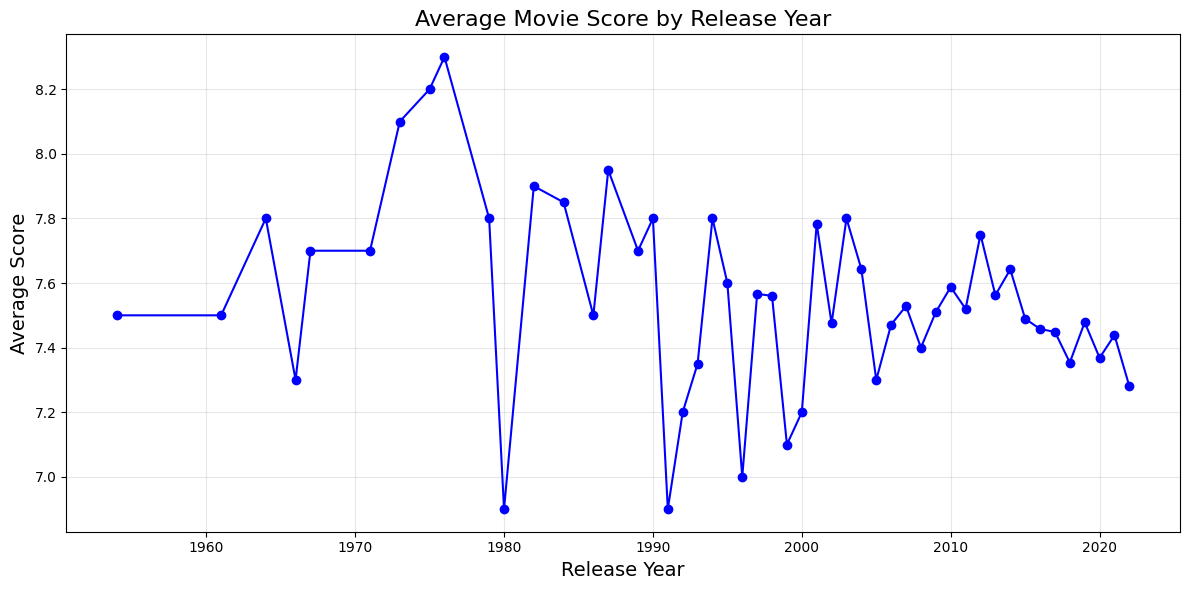

In [ ]:
# วิเคราะห์คะแนนเฉลี่ยของหนัง Best Movies ตามปีที่ออกฉาย
yearly_score = best_movie.groupby('RELEASE_YEAR')['SCORE'].mean()  # หาคะแนนเฉลี่ยตามปี
yearly_score = yearly_score.sort_index()  # จัดเรียงตามปี

# วาดกราฟเส้น (Line Plot)
plt.figure(figsize=(12,6))
plt.plot(yearly_score.index, yearly_score.values, marker='o', linestyle='-', color='b')

# ตกแต่งกราฟ
plt.title('Average Movie Score by Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

/tmp/ipython-input-1974753132.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats.values, y=genre_stats.index, palette='viridis')


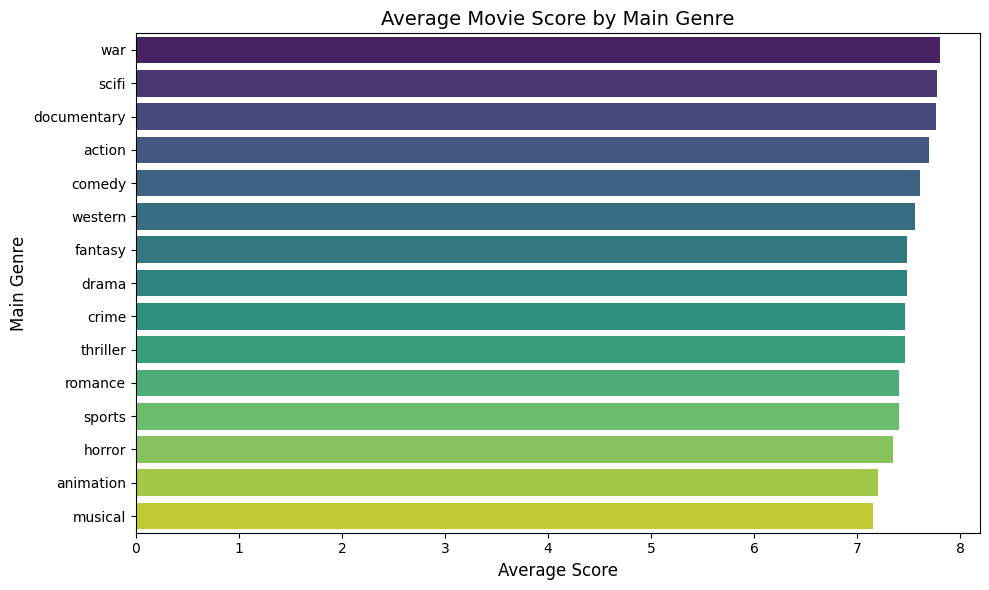

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,show_id,type,...,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,duration_num,duration_type
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB,s1887,Movie,...,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentaries,2020.0,10.0,84.0,min
1,1,Inception,2010,8.8,2268288,148,scifi,GB,s341,Movie,...,"United States, United Kingdom",2021-08-01,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",2021.0,8.0,148.0,min
2,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US,s827,Movie,...,United States,2021-05-30,2021,TV-MA,88 min,Stand-Up Comedy,2021.0,5.0,88.0,min
3,6,Django Unchained,2012,8.4,1472668,165,western,US,s393,Movie,...,United States,2021-07-24,2012,R,165 min,"Action & Adventure, Dramas",2021.0,7.0,165.0,min
4,7,Dangal,2016,8.4,180247,161,action,IN,s5421,Movie,...,India,2017-06-21,2016,TV-PG,161 min,"Dramas, International Movies, Sports Movies",2017.0,6.0,161.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,378,Suffragette,2015,6.9,41529,106,drama,FR,s3262,Movie,...,"United Kingdom, France",2019-11-16,2015,PG-13,107 min,"Dramas, International Movies",2019.0,11.0,107.0,min
239,379,Legend of the Guardians: The Owls of Ga'Hoole,2010,6.9,82623,100,fantasy,US,s7283,Movie,...,"United States, Australia",2020-01-01,2010,PG,97 min,Children & Family Movies,2020.0,1.0,97.0,min
240,380,Christine,2016,6.9,14977,115,drama,US,s2139,Movie,...,"United Kingdom, United States",2020-08-13,2016,R,119 min,"Dramas, Independent Movies",2020.0,8.0,119.0,min
241,381,The Night Comes for Us,2018,6.9,25500,121,thriller,ID,s4501,Movie,...,"Indonesia, United States",2018-10-19,2018,TV-MA,121 min,"Action & Adventure, International Movies",2018.0,10.0,121.0,min


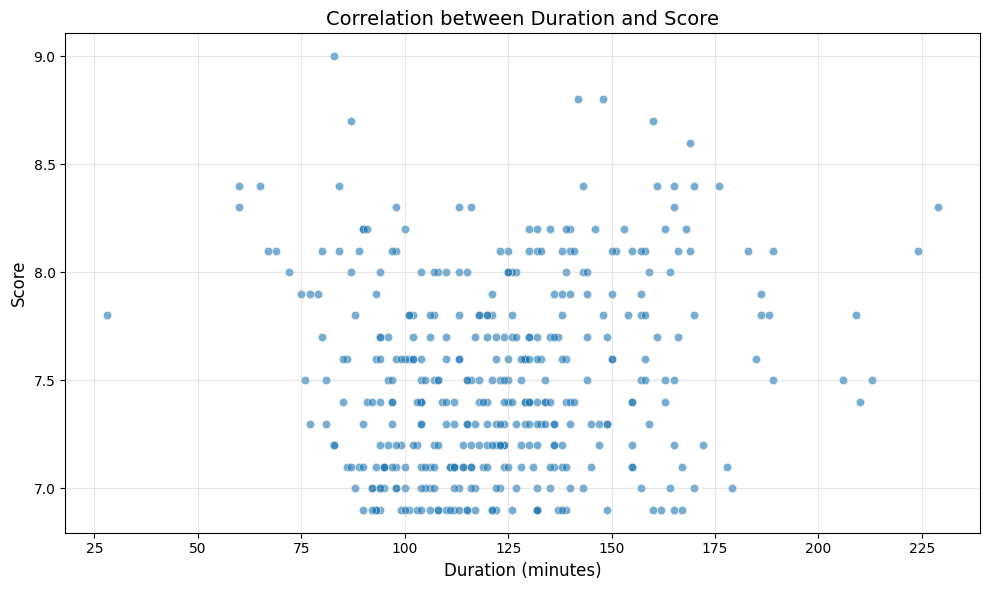

Correlation between DURATION and SCORE: 0.125


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================= 1) คะแนนเฉลี่ยของแต่ละ MAIN_GENRE =========================
# กลุ่มข้อมูลตาม MAIN_GENRE และคำนวณค่าเฉลี่ย SCORE
genre_stats = best_movie.groupby('MAIN_GENRE')['SCORE'].mean().sort_values(ascending=False)

# วาด Barplot แสดงคะแนนเฉลี่ยของแต่ละ Main Genre
plt.figure(figsize=(10,6))
sns.barplot(x=genre_stats.values, y=genre_stats.index, palette='viridis')
plt.xlabel('Average Score', fontsize=12)
plt.ylabel('Main Genre', fontsize=12)
plt.title('Average Movie Score by Main Genre', fontsize=14)
plt.tight_layout()
plt.show()

# หากต้องการใช้ข้อมูล listed_in จาก titles
df = best_movie.merge(
    titles,
    left_on=['TITLE','RELEASE_YEAR'],
    right_on=['title','release_year'],
    how='inner'
)
display(df)  # แสดงข้อมูลที่รวมกัน

# ========================= 2) ความสัมพันธ์ DURATION vs SCORE =========================
# Scatter plot ของ DURATION vs SCORE
plt.figure(figsize=(10,6))
sns.scatterplot(data=best_movie, x='DURATION', y='SCORE', alpha=0.6)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Correlation between Duration and Score', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# คำนวณค่าสหสัมพันธ์ (Correlation Coefficient) ระหว่าง Duration กับ Score
corr = best_movie['DURATION'].corr(best_movie['SCORE'])
print(f"Correlation between DURATION and SCORE: {corr:.3f}")

คำอธิบายผลลัพธ์
🔹 กราฟ Genre

Bar Chart จะแสดงค่าเฉลี่ย SCORE ของแต่ละ MAIN_GENRE

เราจะเห็นได้ว่าแนวหนังประเภทใดได้คะแนนสูงสุด เช่น documentary, drama, sci-fi ฯลฯ

🔹 Scatter: DURATION vs SCORE

จุดแต่ละจุด = หนังแต่ละเรื่อง

ใช้ดูว่าหนังยาว (เช่น > 150 นาที) มีแนวโน้มได้คะแนนสูงหรือไม่

🔹 ค่า Correlation

ค่าระหว่าง -1 ถึง 1

> 0 → ความยาวหนังมากขึ้น คะแนนมักสูงขึ้น

< 0 → หนังยาวขึ้น คะแนนกลับลดลง

≈ 0 → ไม่มีความสัมพันธ์ชัดเจน

# **Merge + Analysis**

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION,show_id,type,...,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,duration_num,duration_type
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB,s1887,Movie,...,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentaries,2020.0,10.0,84.0,min
1,1,Inception,2010,8.8,2268288,148,scifi,GB,s341,Movie,...,"United States, United Kingdom",2021-08-01,2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",2021.0,8.0,148.0,min
2,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US,s827,Movie,...,United States,2021-05-30,2021,TV-MA,88 min,Stand-Up Comedy,2021.0,5.0,88.0,min
3,6,Django Unchained,2012,8.4,1472668,165,western,US,s393,Movie,...,United States,2021-07-24,2012,R,165 min,"Action & Adventure, Dramas",2021.0,7.0,165.0,min
4,7,Dangal,2016,8.4,180247,161,action,IN,s5421,Movie,...,India,2017-06-21,2016,TV-PG,161 min,"Dramas, International Movies, Sports Movies",2017.0,6.0,161.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,378,Suffragette,2015,6.9,41529,106,drama,FR,s3262,Movie,...,"United Kingdom, France",2019-11-16,2015,PG-13,107 min,"Dramas, International Movies",2019.0,11.0,107.0,min
239,379,Legend of the Guardians: The Owls of Ga'Hoole,2010,6.9,82623,100,fantasy,US,s7283,Movie,...,"United States, Australia",2020-01-01,2010,PG,97 min,Children & Family Movies,2020.0,1.0,97.0,min
240,380,Christine,2016,6.9,14977,115,drama,US,s2139,Movie,...,"United Kingdom, United States",2020-08-13,2016,R,119 min,"Dramas, Independent Movies",2020.0,8.0,119.0,min
241,381,The Night Comes for Us,2018,6.9,25500,121,thriller,ID,s4501,Movie,...,"Indonesia, United States",2018-10-19,2018,TV-MA,121 min,"Action & Adventure, International Movies",2018.0,10.0,121.0,min


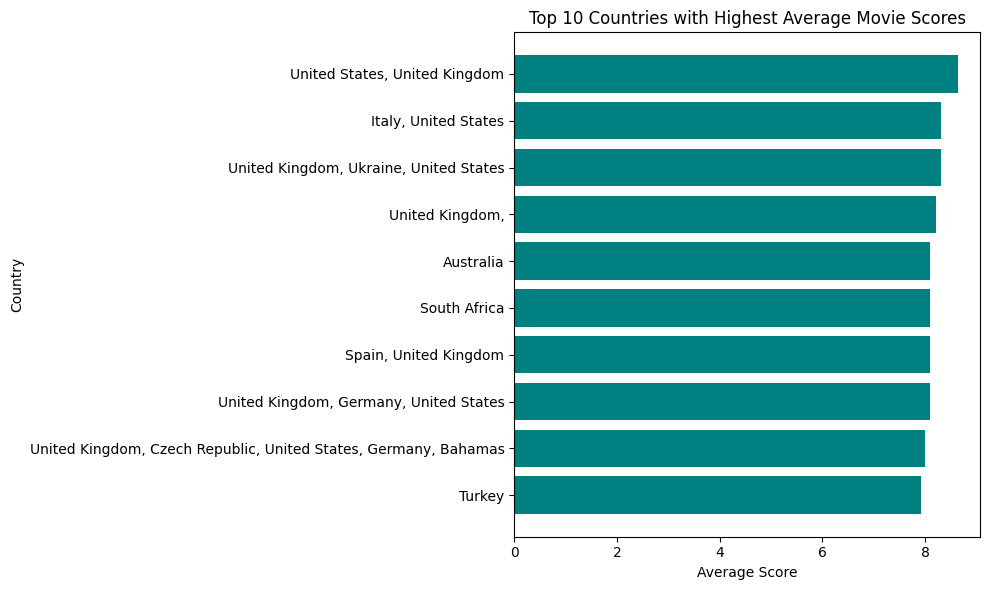

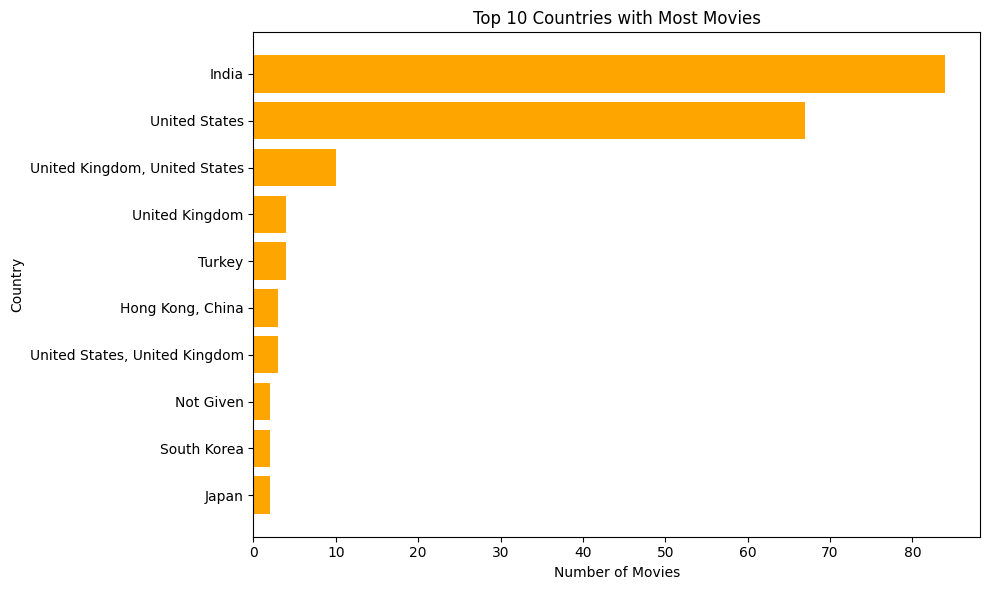

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# รวมตาราง โดยใช้ชื่อหนังและปีเป็น key
df = best_movie.merge(
    titles,
    left_on=['TITLE', 'RELEASE_YEAR'],
    right_on=['title', 'release_year'],
    how='inner'
)
display(df)

# ทำความสะอาดค่า country และ MAIN_PRODUCTION (เอาเฉพาะประเทศแรกถ้าเจอ , )
df['MAIN_PRODUCTION'] = df['MAIN_PRODUCTION'].str.split(',').str[0]
df['country'] = df['country'].fillna(df['MAIN_PRODUCTION'])
df['country'] = df['country'].str.strip()

# จัดกลุ่มตามประเทศ
country_stats = df.groupby('country').agg(
    avg_score=('SCORE', 'mean'),
    movie_count=('TITLE', 'count')
).reset_index()

# เรียงตามค่าเฉลี่ยคะแนน
top_by_score = country_stats.sort_values(by='avg_score', ascending=False).head(10)

# เรียงตามจำนวนหนัง
top_by_count = country_stats.sort_values(by='movie_count', ascending=False).head(10)

# --- กราฟ 1: Top 10 ประเทศที่คะแนนเฉลี่ยการโหวตสูงสุด ---
plt.figure(figsize=(10,6))
plt.barh(top_by_score['country'], top_by_score['avg_score'], color='teal')
plt.xlabel('Average Score')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Average Movie Scores')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
# --- กราฟ 2: Top 10 ประเทศที่มีจำนวนหนังมากที่สุด ---
plt.figure(figsize=(10,6))
plt.barh(top_by_count['country'], top_by_count['movie_count'], color='orange')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Movies')
plt.gca().invert_yaxis()  # ให้ประเทศที่มีจำนวนหนังมากสุดอยู่บน
plt.tight_layout()
plt.show()

avg_score=('SCORE', 'mean')
👉 ในแต่ละประเทศ นำค่าคะแนนจากคอลัมน์ SCORE ของหนังทุกเรื่อง
มาหาค่า เฉลี่ย (mean) เพื่อดูว่า คะแนนเฉลี่ยของหนังในประเทศนั้นเท่าไหร่

movie_count=('TITLE', 'count')
👉 ในแต่ละประเทศ นำชื่อหนังจากคอลัมน์ TITLE
มานับจำนวน (count) เพื่อดูว่า ประเทศนั้นมีหนังกี่เรื่องในชุดข้อมูล
🟢 1. อธิบายแบบ “รวมประเทศ” (ใช้ค่าตามเดิมในคอลัมน์)

เหมาะกับ:

วิเคราะห์ โครงการร่วมผลิต (Co-Production)

ต้องการรู้ว่าการร่วมมือของหลายประเทศให้ผลลัพธ์คะแนนหนังสูงหรือต่ำ เช่น

“หนังที่ร่วมผลิตระหว่าง US และ UK มักได้คะแนนสูงกว่าหนังที่ผลิตโดยประเทศเดียว”

✅ ข้อดี:

แสดงให้เห็นความร่วมมือระหว่างประเทศ

ไม่ทำให้ข้อมูลถูก “ซ้ำ” หลายครั้ง

⚠️ ข้อเสีย:

ไม่ตอบคำถามว่า “แต่ละประเทศ” มีผลงานมากแค่ไหน

ทำให้มีชื่อกลุ่มยาว ๆ และเข้าใจยาก

🔵 2. อธิบายแบบ “แยกประเทศ” (split + explode)

เหมาะกับ:

วิเคราะห์ ผลงานตามประเทศเดี่ยว ๆ

ต้องการตอบว่า

ประเทศไหนมีหนังมากที่สุด

ประเทศไหนได้คะแนนเฉลี่ยสูงที่สุด

✅ ข้อดี:

ตอบโจทย์การเปรียบเทียบประเทศโดยตรง

ทำให้กราฟ/ตารางอ่านง่ายขึ้น

⚠️ ข้อเสีย:

ถ้าเป็นหนังร่วมผลิต หลายประเทศจะถูกนับซ้ำ (เช่นหนังเดียวกันอาจถูกนับให้ US และ UK ทั้งคู่)

ทำให้จำนวนรวมอาจมากกว่าจำนวนหนังจริง

# มุมมองการนำข้อมูลไปใช้ประโยชน์

- วิเคราะห์ **แนวโน้มความนิยมของ Netflix** โดยดูจำนวนเนื้อหาที่เพิ่มตามปี (`year_added`)  
- เปรียบเทียบคะแนนหนัง (`SCORE`) ตาม **ประเทศผู้ผลิต** หรือ **ประเภท Main Genre** เพื่อสนับสนุนการตัดสินใจด้านการลงทุน/ผลิตหนัง  
- วิเคราะห์ **ความสัมพันธ์ระหว่างความยาวหนังกับคะแนน** เพื่อวางแผนการผลิตหนังที่มีแนวโน้มได้รับคะแนนสูง  
- ข้อมูลนี้สามารถใช้เป็น **ฐานข้อมูลสำหรับการแนะนำหนัง (Recommendation System)** หรือ **รายงานสรุปเชิงธุรกิจ**